#Aprendizado de Máquinad -  Não Supervisionado
#Agrupamento - KMeans


Criação de dados

In [ ]:
from sklearn.datasets import make_blobs


# n_samples = numero de linhas , n_features = numero de colunas ,centers =quantidade centros, agrupmentos 
# cluster_std= quanto mais proximo de ZERO mais agrupado e quanto mais perto de 1 mais longe ficam do centro, shuffle = deixa as bolinhas mais randomico
# data= dados em lista , labels =_ = uma lista com valores  entre 0 e 2
# data, labels = make_blobs(n_samples = 300 , n_features=2 , centers =5, cluster_std= 0.5 , shuffle =True)
data, _ = make_blobs(n_samples = 300 , n_features=2 , centers =3, cluster_std= 0.8 , shuffle =True)

###Visualização ( Analise Exploratorio)


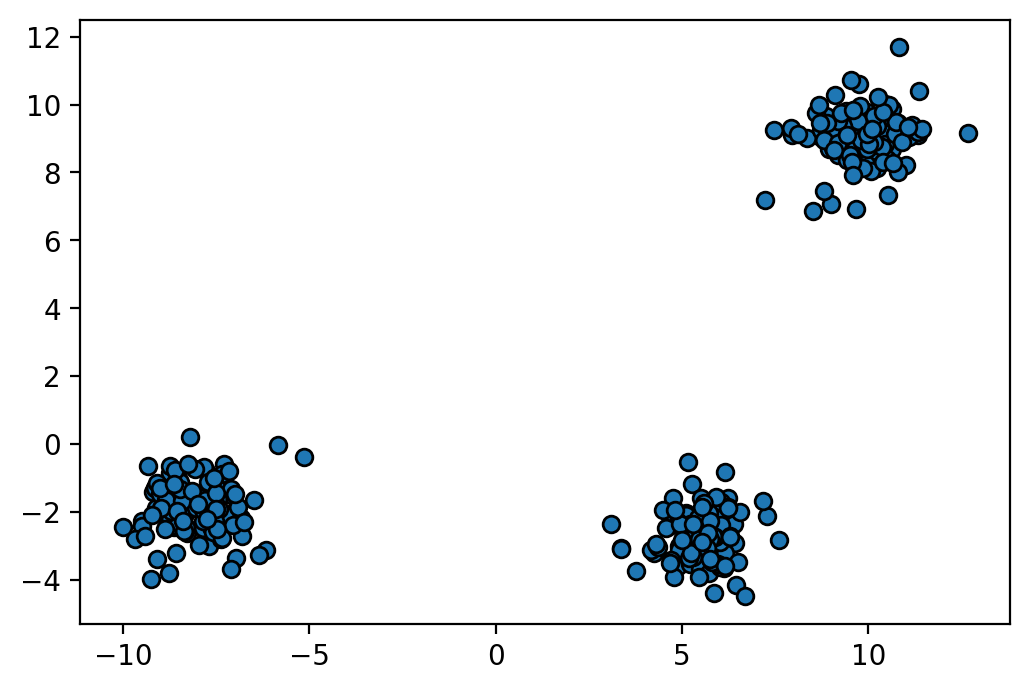

In [ ]:
# é a etapa que mais gasta tempo no aprendizado de maquina
import matplotlib.pyplot as plt

#configurando os dados (dti=200 para aumentar o grafico)
plt.rcParams["figure.dpi"] = 200

 # plt.scatter(corrdenada x , coordenada y , como vai ser o simbolo ="o" , edgecolors=bordas  ) = prota pontos no grafico 
 # data[:, 0] = percorrer todas linhas, e coluna ZERO = corrdenada x
 # data[:, 1] = percorrer todas linhas, e coluna 1 = coordenada y 
plt.scatter(data[:, 0] , data[:, 1] , marker="o", edgecolors="black")
plt.show()


Criação do KMeans


In [ ]:
from sklearn.cluster import KMeans
# numero de agrupmentos(n_clusters) que eu acho que existe ou que quero que existe 
# posso treinar o modelo pra ter mesma quantidade de grupo ou ate mais grupos ou menos
model = KMeans(n_clusters = 3)

#treinar o model/modelo( passando o data pra ele)
# ele vai tenta saber de qual grupo eh cada bolinha
model.fit(data)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Etapa de Predições 


In [ ]:
# dar as prediçoes apos ser treinado , ou seja , dizer as resposta que ele acha q eh de cada bolinha de qual
# centro ele acha que é
resposta = model.predict(data)

### Criando Visualização de respostas


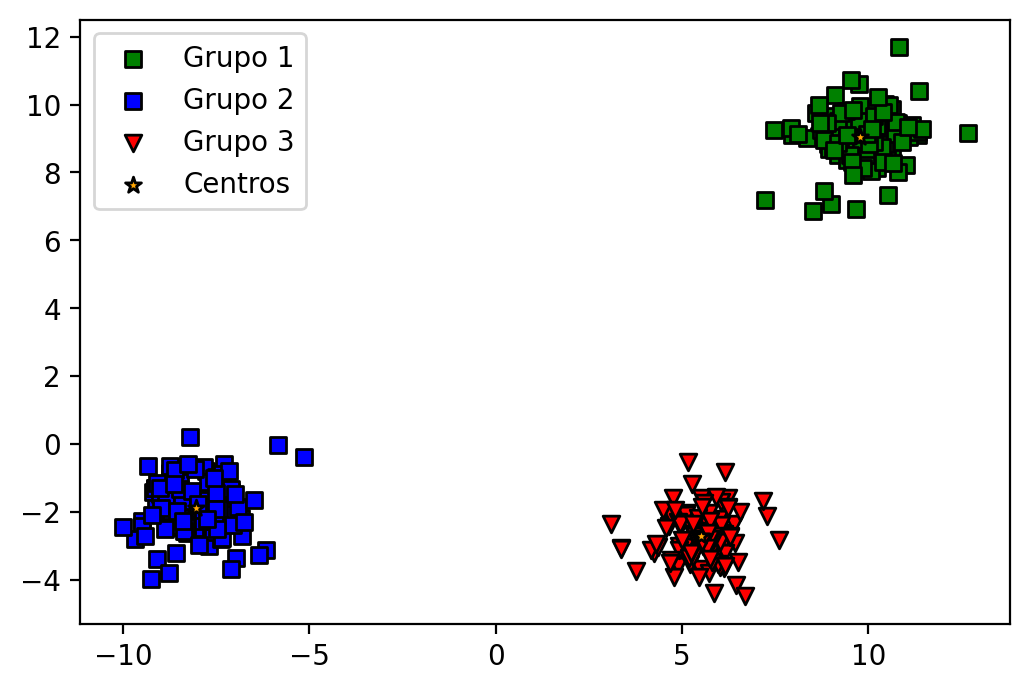

In [ ]:
# criando um grafico para visualizar as respostas que maquina me deu 
# ja que em " model = KMeans(n_clusters = 2)" foi dito q acho q tem 2 grupos ele criara 2 grupos

#grupo_1 - filtre todas respotas que for igual a ZERO / do primeiro grupo
grupo_1 = data[resposta == 0]
grupo_2 = data[resposta == 1]
grupo_3 = data[resposta == 2]

# fala quantos centroides tem 
centroides = model.cluster_centers_

#printar o resultado para vermos do grupo 1 e do grupo 2
plt.scatter(grupo_1[:, 0] , grupo_1[:, 1] , c="green", marker="s" , label = "Grupo 1" , edgecolors="black")
plt.scatter(grupo_2[:, 0] , grupo_2[:, 1] , c="blue", marker="s" , label = "Grupo 2" , edgecolors="black")
plt.scatter(grupo_3[:, 0] , grupo_3[:, 1] , c="red", marker="v" , label = "Grupo 3" , edgecolors="black")

#mostrando onde ele acha que esta o centroides
plt.scatter(centroides[:, 0] , centroides[:, 1] , c="orange", marker="*" , label = "Centros" , edgecolors="black")

#colocando legenda
plt.legend(scatterpoints=True)

plt.show()



Métricas de avalição


In [ ]:
# ver se o metodo usado foi bom,se a maquina deu uma resposta boa 
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# silhouette_score(dados, respostas que o model achou )
# sh = varia de -1 a 1 (quanto mais proximo de 1 melhor )quer dizer q a bolinha esta mais semelhante a aquele grupo analisado mesmo
sh = silhouette_score(data, model.labels_ )

# calinski_harabasz_score(dados, respostas que o model achou )
#ch = quanto maior melhor 
ch = calinski_harabasz_score(data, model.labels_ )

print(f"SH: {sh}") # se o SH ele computa a media de todas as amostras
print("CH: ", ch) 




SH: 0.886428575357996
CH:  9453.96412634994


Método de Elbow

In [ ]:
import pandas as pd 

data = pd.read_csv("clustering_data.csv", sep=';')



Analise Exploratoria



In [ ]:
print(f"Total de dados: {len(data)}")

print(f"Possui dados em branco:\n{data.isna().any()}")

Total de dados: 2297
Possui dados em branco:
f1    True
f2    True
dtype: bool


In [ ]:
#tirar os dados que estao em branco
data = data.dropna()

print(f"Total de dados: {len(data)}")

Total de dados: 1703


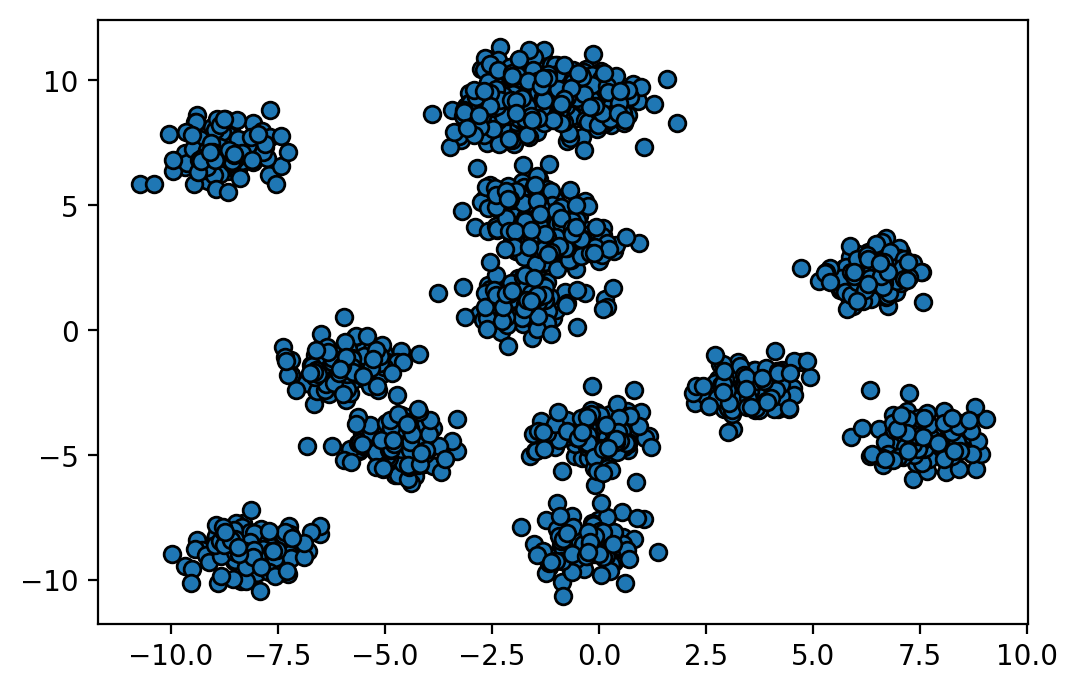

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"]= 200
plt.scatter(data["f1"], data["f2"], marker="o" , edgecolors="black")

plt.show()

Preparando dados

In [ ]:
import numpy as np
data_modelo = []

#percorrendo linha a linha dos dados para transformar os dados em lista de lista
for linha in data.itertuples():
  temp = [linha.f1 , linha.f2]
  data_modelo.append(temp)

data = np.array(data_modelo)
data

array([[ 0.01863667,  8.96499819],
       [-5.737664  , -1.86068695],
       [-4.19508688, -4.6417399 ],
       ...,
       [-7.30031466, -9.62081282],
       [-0.54031681,  4.13978919],
       [-1.38781658,  4.66333865]])

Elbow Method

Método gráfico que consiste em criar vários modelos e depois avaliar

In [ ]:
from sklearn.cluster import KMeans

distortions = []
#achando que tem entre 1 a 21 grupos 
for qtd in range(1,21):
  modelo =  KMeans(n_clusters=qtd)
  modelo.fit(data)

  #media das somas das distancias de cada ponto para o centroide do seu grupo
  metrica = modelo.inertia_
  distortions.append(metrica)

In [ ]:
# é a avalição criada de cada modelo q ele fez com 1,2,3...21 grupos e ve qual fico melhor
distortions

[98009.69789108829,
 49512.09358818307,
 27792.20455625143,
 21099.368612504062,
 15835.030317949171,
 10850.9404223007,
 7803.62015296012,
 5433.714158144837,
 4206.6594757396,
 3231.9462754293345,
 2436.002565612164,
 1836.857522651309,
 1554.8192480738965,
 1403.379697732791,
 1300.320951636258,
 1266.131285423719,
 1218.704227756817,
 1183.37608890325,
 1163.3286968362077,
 1113.501066083737]

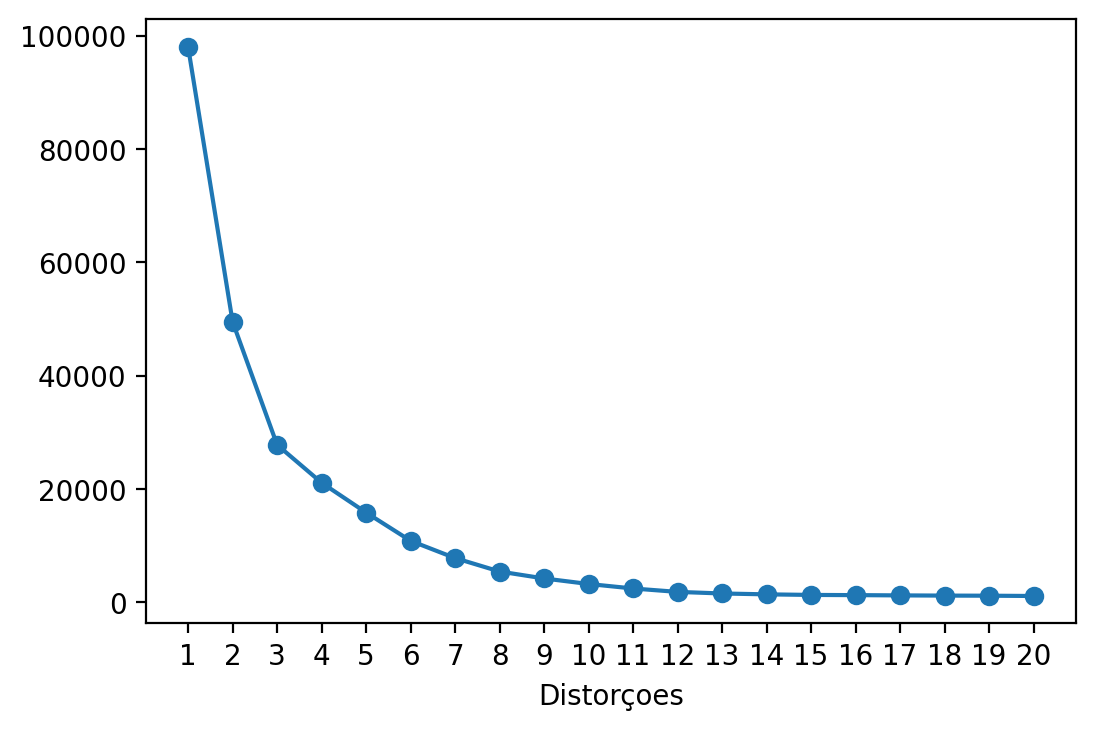

In [ ]:
plt.rcParams["figure.dpi"] =200

plt.plot(range(1,21), distortions , marker="o")

plt.xlabel("quantidade de grupos")
plt.xlabel("Distorçoes")

plt.xticks(range(1,21))

plt.show()

###Criando o modelo com o valor escolhido(ponto que começou a ficar continuo)

In [ ]:
modelo = KMeans(n_clusters=13)
modelo.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
resposta = modelo.predict(data)

#### Metricas de Avaliação

In [ ]:
# ver se o metodo usado foi bom,se a maquina deu uma resposta boa 
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# silhouette_score(dados, respostas que o model achou )
# sh = varia de -1 a 1 (quanto mais proximo de 1 melhor )quer dizer q a bolinha esta mais semelhante a aquele grupo analisado mesmo
sh = silhouette_score(data, modelo.labels_ )

# calinski_harabasz_score(dados, respostas que o model achou )
#ch = quanto maior melhor 
ch = calinski_harabasz_score(data, modelo.labels_ )

print(f"SH: {sh}") # se o SH ele computa a media de todas as amostras
print("CH: ", ch) 

SH: 0.6344201925205011
CH:  8736.586921950302


### Visualição da predição

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

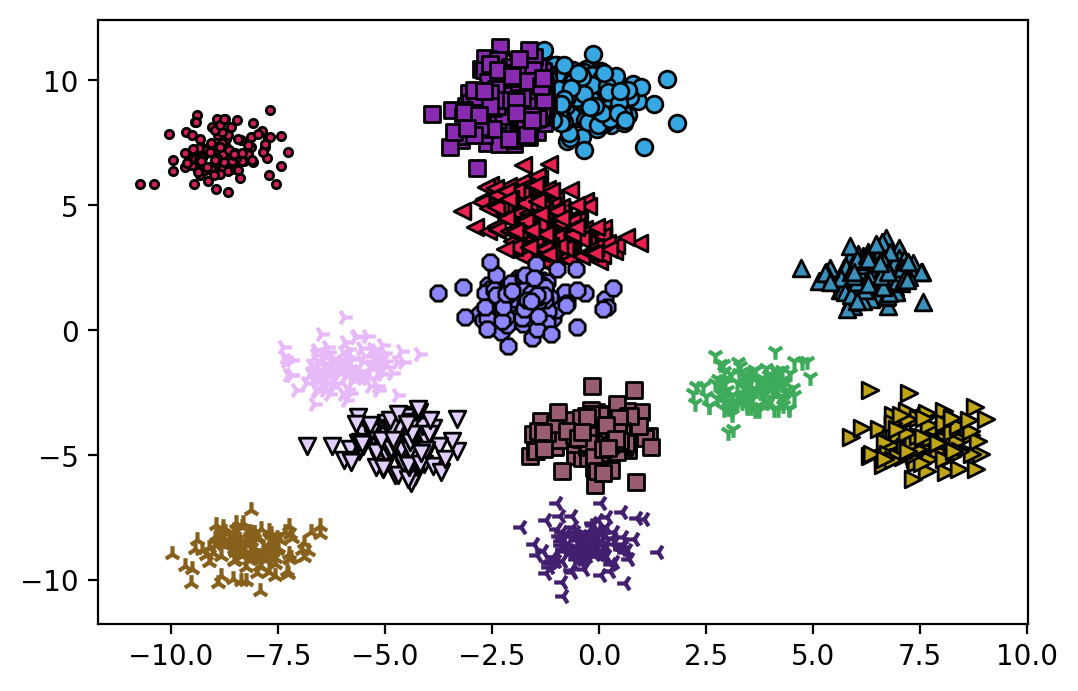

In [ ]:
from matplotlib.lines import Line2D

markers= list(Line2D.markers.keys())

for i in range(13):
  grupo=data[resposta== i]
  plt.scatter(grupo[:,0], grupo[:,1], c =np.random.rand(3), marker= markers[i], edgecolors="black")
  
plt.show()